# Investigating the current state of the loans

Let's summarise the current percentage of the loans that are recovered against the investor funding and the total amount funded and visualise the results on an appropriate graph.

In [1]:
import db_utils as dbu
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('loan_payments_clean.csv')

We'll sum the total_payment variable and the funded_amount and funded_amount_inv.  We can then plot them in a bar chart:

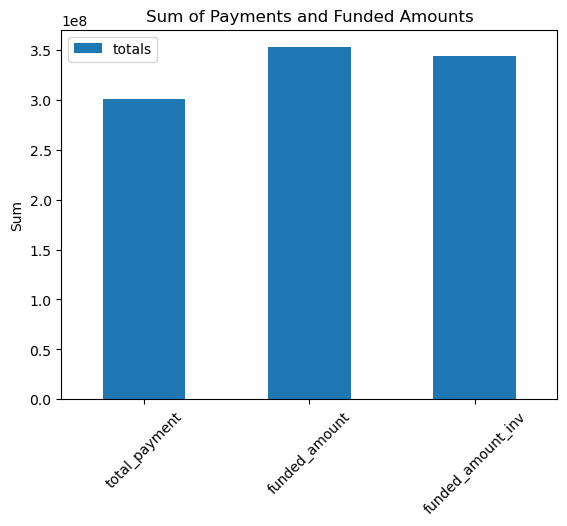

In [2]:
totals_series = df[['total_payment', 'funded_amount', 'funded_amount_inv']].sum()
totals_df = totals_series.to_frame(name='totals')
totals_df.plot(kind='bar')
plt.ylabel('Sum')
plt.title('Sum of Payments and Funded Amounts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

A nice way to visualise them might be as percentages of the funding.

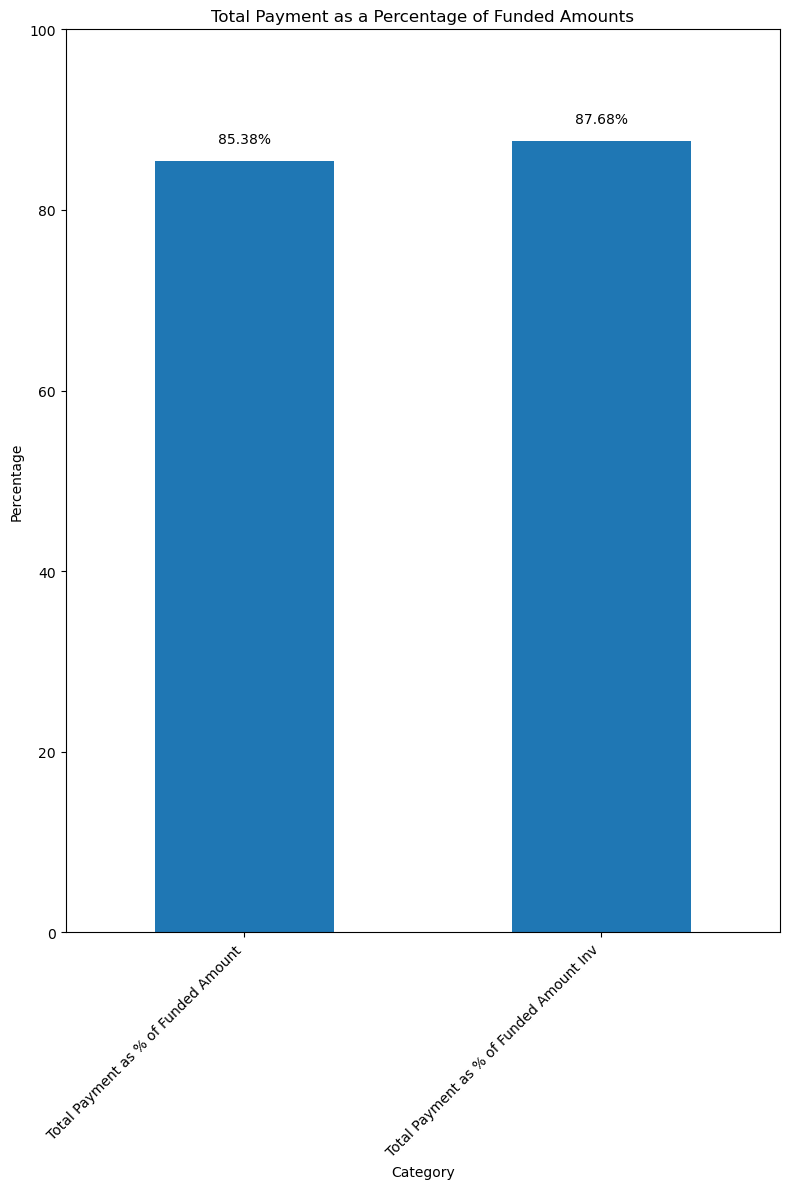

In [3]:

# Summing the columns
total_payment_sum = df['total_payment'].sum()
funded_amount_sum = df['funded_amount'].sum()
funded_amount_inv_sum = df['funded_amount_inv'].sum()

# Calculate the percentages
percent_funded_amount = (total_payment_sum / funded_amount_sum) * 100
percent_funded_amount_inv = (total_payment_sum / funded_amount_inv_sum) * 100

# Create a DataFrame with the percentages
percentages = {
    'Category': ['Total Payment as % of Funded Amount', 'Total Payment as % of Funded Amount Inv'],
    'Percentage': [percent_funded_amount, percent_funded_amount_inv]
}
percentages_df = pd.DataFrame(percentages)

# Plotting the percentages
fig, ax = plt.subplots(figsize=(8, 12))  # Make the plot 3 times taller (default is (6, 4), so (8, 12) is 3 times taller)
percentages_df.plot(kind='bar', x='Category', y='Percentage', legend=False, ax=ax)
plt.ylabel('Percentage')
plt.title('Total Payment as a Percentage of Funded Amounts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100

# Add percentage labels on the bars
for index, row in percentages_df.iterrows():
    ax.text(index, row['Percentage'] + 2, f"{row['Percentage']:.2f}%", ha='center')

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


### Future predictions

Additionally let's visualise what percentage of the total amount would be recovered up to 6 months' in the future.  We'll need to add 6*installment onto each total payment for each record that has 'Current' status.  There are more status' that will potential also increase but this will give us a conservative estimate.  We should also add a check that the 6 month prediciton for each record doesn't exceed the amount they owe.

predicted_6_mths_total_payment = if (loan_status == 'Current') and (out_prncp > total payment + 6*installment) then total payment + 6*installment, else total_payment

In [6]:
def calculate_predicted_payment(row):
    if row['loan_status'] != 'Current':
        return row['total_payment']
    elif row['out_prncp'] < 6 * row['instalment']:
        return row['total_payment'] + row['out_prncp']
    else:
        return row['total_payment'] + 6 * row['instalment']

df['predicted_6_mths_total_payment'] = df.apply(calculate_predicted_payment, axis=1)

print(df.head())

   Unnamed: 0        id  member_id  loan_amount  funded_amount  \
0           0  38676116   41461848         8000         8000.0   
1           1  38656203   41440010        13200        13200.0   
2           2  38656111   41439917         2525         2525.0   
3           3  38656063   41439868        10000        10000.0   
4           4  38656052   41439857        10000        10000.0   

   funded_amount_inv  int_rate  instalment  annual_inc    dti  ...  \
0             8000.0      7.49      248.82     46000.0  19.54  ...   
1            13200.0      6.99      407.52     50000.0  24.20  ...   
2             2525.0     11.44       83.20     32000.0   6.60  ...   
3            10000.0     12.99      227.48     50048.0  20.67  ...   
4            10000.0      8.19      314.25    103000.0  15.95  ...   

   verification_status  issue_date  loan_status  payment_plan  \
0         Not Verified  2021-01-01      Current             n   
1         Not Verified  2021-01-01      Current     

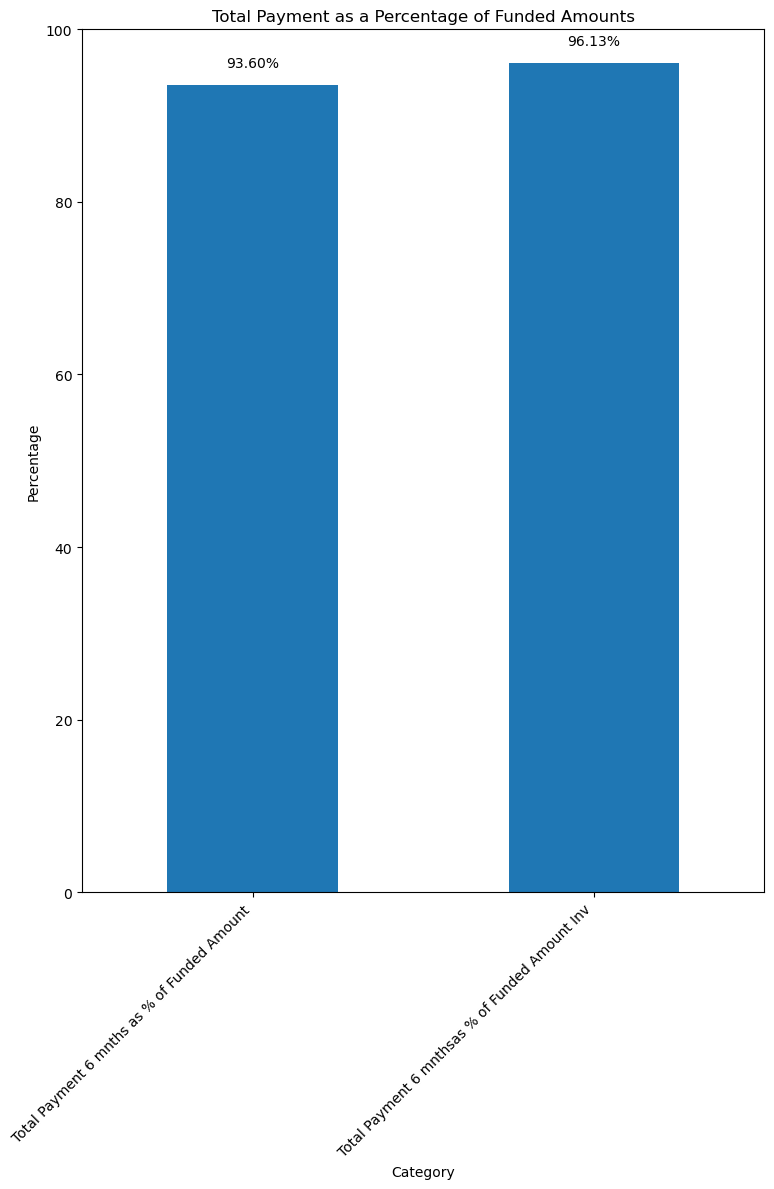

In [7]:
# Summing the columns
funded_amount_sum = df['funded_amount'].sum()
funded_amount_inv_sum = df['funded_amount_inv'].sum()
total_payment_sum_6_mths = df['predicted_6_mths_total_payment'].sum()

# Calculate the percentages
percent_funded_amount_6_mths = (total_payment_sum_6_mths / funded_amount_sum) * 100
percent_funded_amount_inv_6_mths= (total_payment_sum_6_mths / funded_amount_inv_sum) * 100

# Create a DataFrame with the percentages
percentages = {
    'Category': ['Total Payment 6 mnths as % of Funded Amount', 'Total Payment 6 mnthsas % of Funded Amount Inv'],
    'Percentage': [percent_funded_amount_6_mths, percent_funded_amount_inv_6_mths]
}
percentages_df = pd.DataFrame(percentages)

# Plotting the percentages
fig, ax = plt.subplots(figsize=(8, 12))  # Make the plot 3 times taller (default is (6, 4), so (8, 12) is 3 times taller)
percentages_df.plot(kind='bar', x='Category', y='Percentage', legend=False, ax=ax)
plt.ylabel('Percentage')
plt.title('Total Payment as a Percentage of Funded Amounts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100

# Add percentage labels on the bars
for index, row in percentages_df.iterrows():
    ax.text(index, row['Percentage'] + 2, f"{row['Percentage']:.2f}%", ha='center')

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()